<a href="https://colab.research.google.com/github/o-bissing/TF_Udemy/blob/main/RNN_on_a_Sine_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y = np.sin(x)

In [5]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

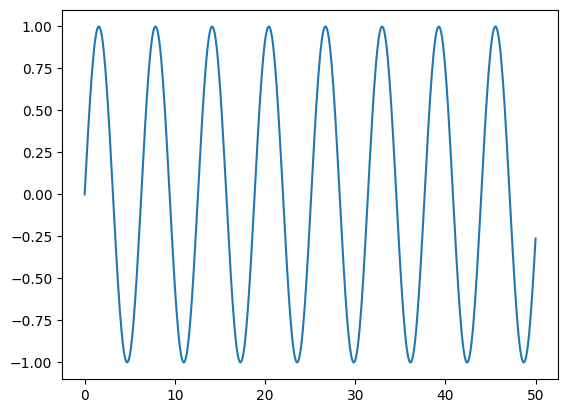

In [6]:
plt.plot(x,y)

In [7]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [8]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


# Train test split

In [9]:
len(df)

501

In [10]:
test_percent = 0.1

In [11]:
len(df)*test_percent

50.1

In [12]:
test_point = np.round(len(df)*test_percent)

In [13]:
test_point

50.0

In [14]:
test_ind = int(len(df)-test_point)

In [15]:
test_ind

451

In [16]:
train = df.iloc[:test_ind]

In [17]:
test = df.iloc[test_ind:]

In [18]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [19]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


# Scale the data

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(train)

MinMaxScaler()

In [23]:
scaled_train = scaler.transform(train)

In [24]:
scaled_test = scaler.transform(test)

# Creating batches

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [33]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=batch_size)

In [34]:
len(scaled_train)

451

In [35]:
len(generator)

426

In [36]:
X,y=generator[0]

In [37]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [38]:
y

array([[0.79923759]])

In [39]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


# Creating a model

In [41]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=batch_size)

In [43]:
from tensorflow.keras.models import Sequential

In [45]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [46]:
n_features = 1

In [47]:
model = Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


<ipython-input-49-063492f5aede>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


401/401 [==============================] - 5s 7ms/step - loss: 0.0030
Epoch 2/5
401/401 [==============================] - 3s 8ms/step - loss: 3.6573e-04
Epoch 3/5
401/401 [==============================] - 5s 13ms/step - loss: 2.1773e-04
Epoch 4/5
401/401 [==============================] - 3s 8ms/step - loss: 1.1535e-05
Epoch 5/5
401/401 [==============================] - 5s 12ms/step - loss: 5.7248e-04


In [50]:
losses = pd.DataFrame(model.history.history)

<Axes: >

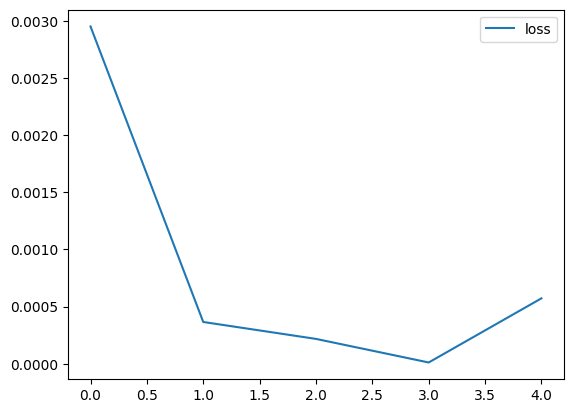

In [51]:
losses.plot()

In [52]:
first_eval_batch = scaled_train[-length:]

In [53]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [54]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 249ms/step


array([[0.93847]], dtype=float32)

In [55]:
scaled_test[0]

array([0.94955134])

In [57]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


In [58]:
test_predictions

[array([0.93847], dtype=float32),
 array([0.9544595], dtype=float32),
 array([0.9665606], dtype=float32),
 array([0.97046286], dtype=float32),
 array([0.9696598], dtype=float32),
 array([0.9654474], dtype=float32),
 array([0.9545066], dtype=float32),
 array([0.93992144], dtype=float32),
 array([0.9193204], dtype=float32),
 array([0.896289], dtype=float32),
 array([0.86899143], dtype=float32),
 array([0.8379571], dtype=float32),
 array([0.80263686], dtype=float32),
 array([0.7655713], dtype=float32),
 array([0.72473323], dtype=float32),
 array([0.6812346], dtype=float32),
 array([0.636053], dtype=float32),
 array([0.58997405], dtype=float32),
 array([0.541562], dtype=float32),
 array([0.49344137], dtype=float32),
 array([0.44401997], dtype=float32),
 array([0.39517882], dtype=float32),
 array([0.34660777], dtype=float32),
 array([0.29930583], dtype=float32),
 array([0.25302273], dtype=float32),
 array([0.2098997], dtype=float32),
 array([0.16810109], dtype=float32),
 array([0.1293725], 

In [59]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 0.87693474],
       [ 0.90891345],
       [ 0.93311548],
       [ 0.94091993],
       [ 0.93931384],
       [ 0.93088915],
       [ 0.90900763],
       [ 0.87983758],
       [ 0.83863585],
       [ 0.79257339],
       [ 0.73797871],
       [ 0.67591051],
       [ 0.60527063],
       [ 0.5311401 ],
       [ 0.44946463],
       [ 0.36246806],
       [ 0.27210564],
       [ 0.17994842],
       [ 0.08312514],
       [-0.01311538],
       [-0.11195739],
       [-0.2096389 ],
       [-0.30678022],
       [-0.40138336],
       [-0.49394881],
       [-0.58019419],
       [-0.66379073],
       [-0.74124727],
       [-0.80955235],
       [-0.87107115],
       [-0.9256086 ],
       [-0.96904056],
       [-1.00409956],
       [-1.02864141],
       [-1.04375741],
       [-1.04895896],
       [-1.04376317],
       [-1.02809184],
       [-1.00545439],
       [-0.97338929],
       [-0.93111337],
       [-0.88257797],
       [-0.82767635],
       [-0.76333706],
       [-0.69449084],
       [-0

In [60]:
test['Predictions'] = true_predictions

<ipython-input-60-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: >

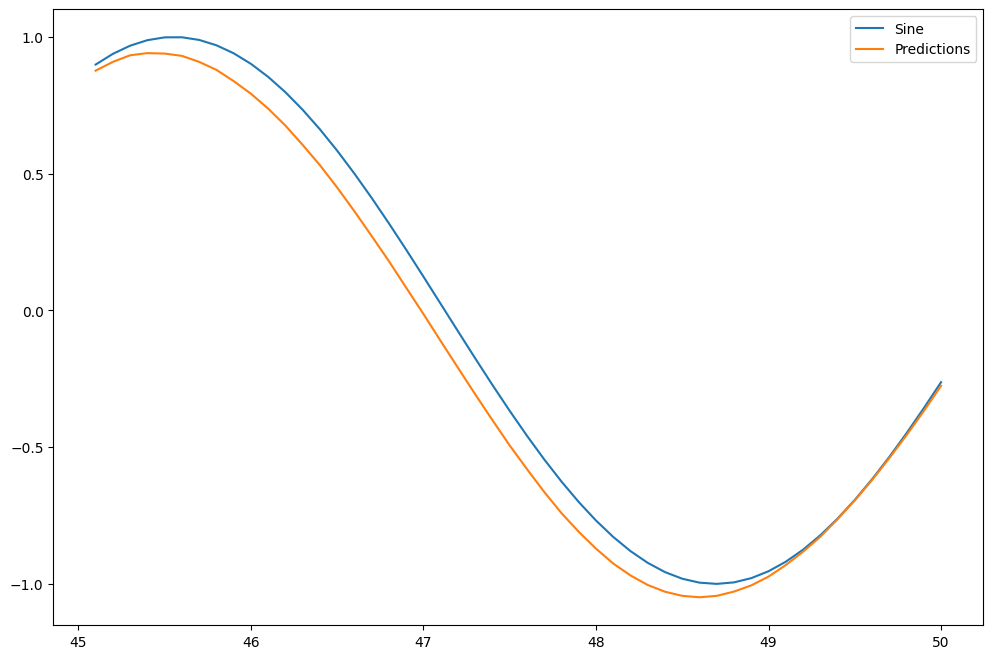

In [63]:
test.plot(figsize=(12,8))